This step focuses on EDA analysis for the data. The goal of the EDA work is to
get familiar with the features in our dataset, investigate the relationships between
features, and generally understand the core characteristics of the dataset. We will continue to clean, transform, and visualize data and correlations. 

# **_Importing libraries_**

**_Loading Appliances Energy Usage Data_**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from library.sb_utils import save_file

import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# _Data Science Problem_

The purpose of this data science project is to come up with a model to predict the applainces energy usage based on consumner's house temperature and humidity conditions plus outside enviromental conditions 

In [2]:
df = pd.read_csv('C:/Users/msale/Documents/Springboard Data Science Track_Jan 2022/Springboard-Capstone-Two/Data_Files/appliances_clean_df.csv')

In [3]:
df.head()

,date,Appliances_E_Wh,Lights_E_Wh,T_Kitchen,H_Kitchen,T_Living,H_Living,T_Laundry,H_Laundry,T_Office,...,T_Teenager,H_Teenager,T_Parents,H_Parents,T_out,Press_out,H_out,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,4.094345,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,4.094345,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,3.912023,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,2016-01-11 17:30:00,3.912023,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,2016-01-11 17:40:00,4.094345,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               19735 non-null  object 
 1   Appliances_E_Wh    19735 non-null  float64
 2   Lights_E_Wh        19735 non-null  int64  
 3   T_Kitchen          19735 non-null  float64
 4   H_Kitchen          19735 non-null  float64
 5   T_Living           19735 non-null  float64
 6   H_Living           19735 non-null  float64
 7   T_Laundry          19735 non-null  float64
 8   H_Laundry          19735 non-null  float64
 9   T_Office           19735 non-null  float64
 10  H_Office           19735 non-null  float64
 11  T_Bathroom         19735 non-null  float64
 12  H_Bathroom         19735 non-null  float64
 13  T_Building_out_NS  19735 non-null  float64
 14  H_Building_out_NS  19735 non-null  float64
 15  T_Ironning         19735 non-null  float64
 16  H_Ironing          197

In [5]:
df['date'] = pd.to_datetime(df['date'])  # converting date column to date type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               19735 non-null  datetime64[ns]
 1   Appliances_E_Wh    19735 non-null  float64       
 2   Lights_E_Wh        19735 non-null  int64         
 3   T_Kitchen          19735 non-null  float64       
 4   H_Kitchen          19735 non-null  float64       
 5   T_Living           19735 non-null  float64       
 6   H_Living           19735 non-null  float64       
 7   T_Laundry          19735 non-null  float64       
 8   H_Laundry          19735 non-null  float64       
 9   T_Office           19735 non-null  float64       
 10  H_Office           19735 non-null  float64       
 11  T_Bathroom         19735 non-null  float64       
 12  H_Bathroom         19735 non-null  float64       
 13  T_Building_out_NS  19735 non-null  float64       
 14  H_Buil

# Explore The Data

### Looking at the relationships of target variable (Appliance_E_Wh) to other features of the data set 

In [7]:
def scatterplots(columns, ncol=None, figsize=(15, 15)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Appliances_E_Wh', data=df, alpha=0.5)
        #regplot(x= col, y = 'Appliances_E_Wh', data=df, alpha=0.5, fit_reg = True);
        
        ax.set(xlabel=col, ylabel='Appliances_E_Wh')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [8]:
df.columns

Index(['date', 'Appliances_E_Wh', 'Lights_E_Wh', 'T_Kitchen', 'H_Kitchen',
       'T_Living', 'H_Living', 'T_Laundry', 'H_Laundry', 'T_Office',
       'H_Office', 'T_Bathroom', 'H_Bathroom', 'T_Building_out_NS',
       'H_Building_out_NS', 'T_Ironning', 'H_Ironing', 'T_Teenager',
       'H_Teenager', 'T_Parents', 'H_Parents', 'T_out', 'Press_out', 'H_out',
       'Windspeed', 'Visibility', 'Tdewpoint'],
      dtype='object')

In [9]:
features = [column for column in df.columns if column not in ['date', 'Appliances_E_Wh']]

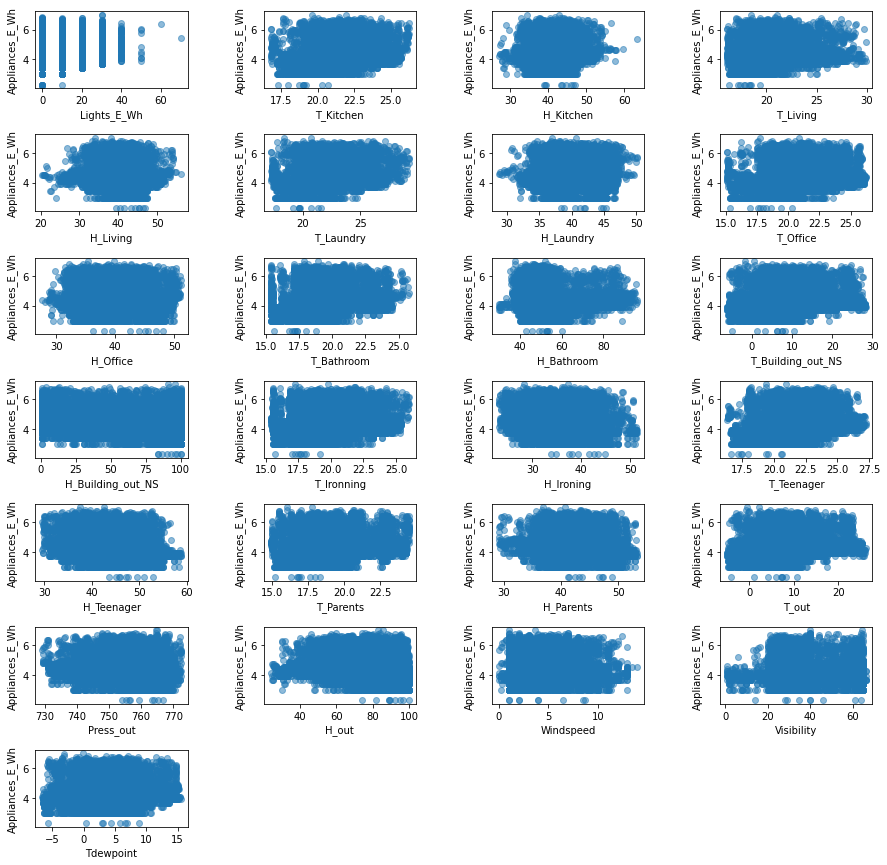

In [10]:
scatterplots(features, ncol=4, figsize=(15, 15)) 

In [11]:
df_corr = df.corr()['Appliances_E_Wh'].abs().sort_values().sort_values(ascending=False)  # Correlation matrix 
df_corr

Appliances_E_Wh      1.000000
Lights_E_Wh          0.261442
H_out                0.226185
T_Living             0.214756
T_Building_out_NS    0.196546
T_out                0.176161
H_Building_out_NS    0.174133
T_Laundry            0.167221
H_Teenager           0.165397
T_Kitchen            0.160747
T_Teenager           0.153917
T_Office             0.132359
H_Parents            0.115582
T_Ironning           0.110415
T_Bathroom           0.110099
H_Ironing            0.096231
H_Living             0.093674
T_Parents            0.092553
Windspeed            0.087722
H_Kitchen            0.084457
Press_out            0.072632
Tdewpoint            0.056241
H_Bathroom           0.024312
Visibility           0.010970
H_Office             0.006533
H_Laundry            0.006462
Name: Appliances_E_Wh, dtype: float64

_Appliances_E_Wh_ is generaly positively correlated with temperature and negatively with humidity. _Appliances_E_Wh_ is showing the highest positive correlation with _Lights_E_Wh_, _'T_Living'_, and _'T_Building_out_NS'_. It is negatively correlated with _'H_out'_, _'H_Teenager'_, and _'H_Building_out_NS'_. 

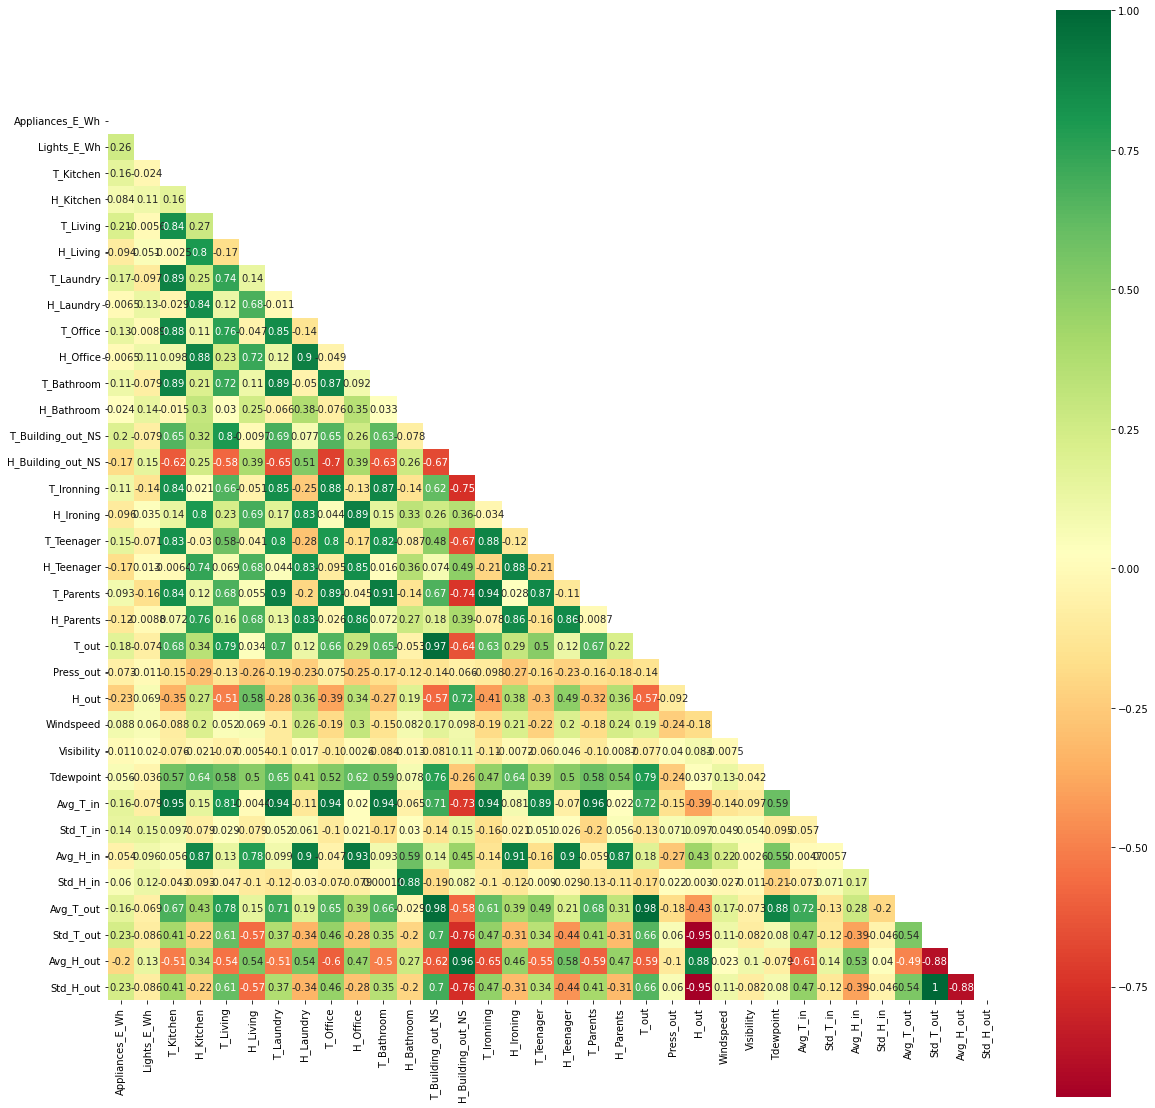

In [59]:
plt.figure(figsize=(20,20))

matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot=True, mask=matrix, square=True, cmap='RdYlGn'); 


Temperatures are strongly and negatively correlated with H_Building_out_NS and to less extent with H_out. 

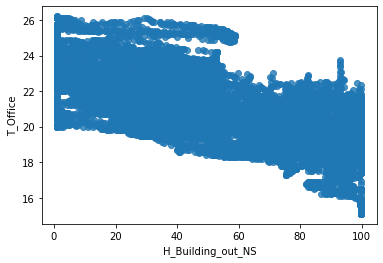

In [13]:
sns.regplot(data=df, y= df['T_Office'], x= df['H_Building_out_NS']);

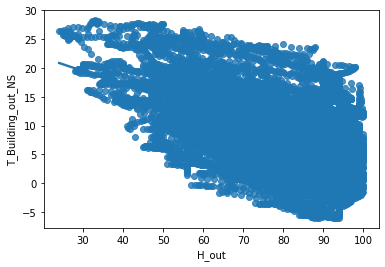

In [14]:
sns.regplot(data=df, y=df['T_Building_out_NS'], x=df['H_out']);

Some features are correlated with one another than others.

One way to disentangle this interconnected web of relationships is via principle components analysis (PCA). This technique will find linear combinations of the original features and order them by the amount of variance they explain. We can use these derived features to visualize the data in a lower dimension and know how much variance the representation explains. We can also explore how the original features contribute to these derived features.


The basic steps in this process are:

    1)scale the data (important here because our features are heterogenous)
    2)fit the PCA transformation (learn the transformation from the data)
    3)apply the transformation to the data to create the derived features
    (optionally) use the derived features to look for patterns in the data and explore the coefficients

In [15]:
df_columns = df.columns

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# Separating out the features
X = df.drop(["Appliances_E_Wh", "date"],axis=1)  # considering all the numeric variables  
# Separating out the target
y = df['Appliances_E_Wh']

In [18]:
# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)

In [19]:
X_scaled[:2]

array([[ 3.30126384, -1.11864475,  1.84382063, -0.52041138,  1.07368343,
        -1.23506343,  1.68612997, -0.90821667,  1.50643758, -1.31490324,
         0.47116038, -0.14519618,  0.95179837, -1.45364639,  1.21986131,
        -1.95750878,  1.14157236, -1.21732362,  0.95813624, -0.15264674,
        -2.97632767,  0.82208042,  1.20769354,  2.09159642,  0.3669753 ],
       [ 3.30126384, -1.11864475,  1.61680671, -0.52041138,  1.05709748,
        -1.23506343,  1.70456601, -0.90821667,  1.6045285 , -1.31490324,
         0.47116038, -0.17694121,  0.94559165, -1.45364639,  1.2068254 ,
        -1.95750878,  1.13455378, -1.20077824,  0.96536273, -0.17458781,
        -2.96281279,  0.82208042,  1.07170342,  1.76658397,  0.34313479]])

##### Verifying the scaling

In [20]:
X_scaled.mean(), X_scaled.std(ddof=0)   # mean will be close to 0 and std ~ 1. 

(8.719351283275299e-16, 1.0000000000000002)

#### Performing PCA 

In [21]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

In [22]:
principalComponents = pca.fit(X_scaled)

In [23]:
principalComponents.components_[:2]

array([[-0.03123943,  0.3008931 ,  0.08088714,  0.27931789,  0.01222267,
         0.3038484 , -0.01022108,  0.29767007,  0.04182865,  0.29919899,
        -0.02150871,  0.27579169, -0.24537153,  0.29502784,  0.05699321,
         0.26816612,  0.00077216,  0.30452656,  0.03479692,  0.27948677,
        -0.05906121, -0.14894917, -0.01423467, -0.03694146,  0.23072861],
       [-0.03868446,  0.00902033, -0.33178076, -0.02510168, -0.3031457 ,
        -0.01287147, -0.34884323,  0.05085791, -0.35800007,  0.00115427,
        -0.15162482, -0.04098863, -0.19939897,  0.08478175, -0.3473118 ,
         0.09425086, -0.34557242,  0.04923007, -0.33716839, -0.0556074 ,
         0.11313308, -0.18785988, -0.10557439, -0.00858355, -0.21012296]])

In [24]:
pd.DataFrame(principalComponents.components_)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.031239,0.300893,0.080887,0.279318,0.012223,0.303848,-0.010221,0.297670,0.041829,0.299199,...,0.268166,0.000772,0.304527,0.034797,0.279487,-0.059061,-0.148949,-0.014235,-0.036941,0.230729
1,-0.038684,0.009020,-0.331781,-0.025102,-0.303146,-0.012871,-0.348843,0.050858,-0.358000,0.001154,...,0.094251,-0.345572,0.049230,-0.337168,-0.055607,0.113133,-0.187860,-0.105574,-0.008584,-0.210123
2,0.031467,-0.095542,0.008750,0.188955,-0.268449,-0.135630,0.068110,-0.120842,0.085717,-0.184367,...,-0.249234,-0.036024,-0.181853,0.018534,0.310487,0.013601,-0.465748,0.496594,-0.020780,0.036562
3,0.745995,0.125475,0.014436,0.125747,-0.089642,-0.009959,0.058143,0.095938,0.010227,0.073662,...,0.094107,-0.074503,-0.061675,-0.132206,-0.087997,-0.188675,-0.053619,0.083869,-0.077173,-0.144457
4,0.232740,0.042833,0.009561,0.141432,-0.104975,-0.033786,0.066518,0.075479,0.060068,-0.011064,...,-0.087067,0.056432,-0.067043,0.068576,0.064893,0.688958,-0.036947,-0.327021,0.529510,0.037394
5,0.004525,0.023647,-0.028119,-0.039128,0.021169,0.020698,-0.050718,-0.043023,-0.037379,0.019802,...,0.108082,-0.013509,0.033726,-0.058768,-0.017980,-0.461398,0.051930,0.237170,0.827212,0.012973
6,0.573441,-0.058092,0.102701,-0.129701,0.193451,0.026630,-0.032753,0.017316,0.021804,-0.083256,...,-0.021833,-0.100170,0.032834,-0.029263,0.047433,0.004255,0.108188,0.024953,-0.121999,0.149258
7,0.017134,-0.116990,0.067464,-0.386440,0.410553,0.034987,-0.160733,-0.051955,-0.034831,0.077312,...,0.104010,-0.112147,0.121470,-0.060750,0.032282,0.408907,0.041787,0.515701,0.049795,0.122028
8,-0.035458,0.288164,-0.171179,0.173307,-0.194596,0.109972,0.108681,0.123437,0.012469,0.100115,...,0.110245,0.143055,0.008609,0.229033,-0.252164,0.257327,0.060485,0.506646,-0.047283,-0.270234
9,-0.087202,-0.038338,0.441859,-0.018173,0.277059,0.025047,0.355486,0.020293,0.062838,0.014836,...,0.044300,-0.213506,0.003366,0.044297,-0.116078,-0.011532,-0.468746,-0.120672,0.064970,-0.449949


In [25]:
pca_features = ['PC' + " " + str(i) for i in range(1,12)]

In [26]:
pca_features

['PC 1',
 'PC 2',
 'PC 3',
 'PC 4',
 'PC 5',
 'PC 6',
 'PC 7',
 'PC 8',
 'PC 9',
 'PC 10',
 'PC 11']

Plot the cumulative variance ratio vs number of components.

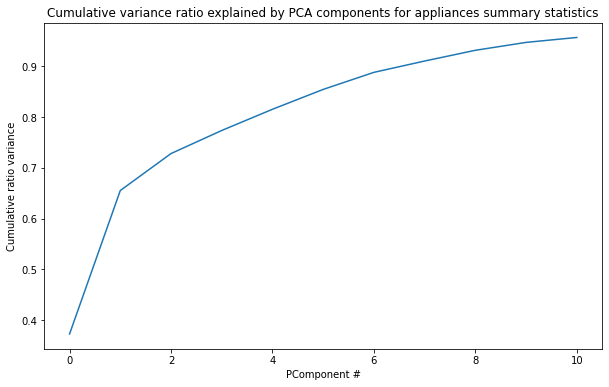

In [27]:
plt.subplots(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('PComponent #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for appliances summary statistics');

In [28]:
pca.explained_variance_ratio_.cumsum()

array([0.37291678, 0.65542713, 0.72821719, 0.77366811, 0.81543227,
       0.85454978, 0.88814657, 0.91044715, 0.93158412, 0.94713677,
       0.95684011])

The first two components seem to account for over 65% of the variance, and the first 11 for over 95%.

In [29]:
pca_X = pca.transform(X_scaled)

In [30]:
pca_X.shape

(19735, 11)

In [31]:
principalDf = pd.DataFrame(data = pca_X, columns = pca_features )

In [32]:
finalDf = pd.concat([df['Appliances_E_Wh'],principalDf], axis = 1) 

In [33]:
finalDf.head()

,Appliances_E_Wh,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11
0,4.094345,-2.919677,-4.690671,1.445333,2.483342,-0.126247,2.860468,1.828045,-0.741715,-1.301685,0.207003,-0.421934
1,4.094345,-2.935507,-4.619097,1.377084,2.502209,-0.243768,2.555919,1.834324,-0.849354,-1.285863,0.132478,-0.482474
2,3.912023,-2.971388,-4.532836,1.315877,2.522071,-0.368437,2.253605,1.857816,-0.949955,-1.299792,0.123511,-0.499839
3,3.912023,-3.054577,-4.510041,1.299726,3.482823,-0.197792,1.952724,2.606588,-1.023215,-1.382615,0.003889,-0.725394
4,4.094345,-3.050227,-4.489144,1.214374,3.506930,-0.322025,1.648082,2.638839,-1.109189,-1.412758,0.038116,-0.720129


In [34]:
finalDf.corr()

,Appliances_E_Wh,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11
Appliances_E_Wh,1.000000,1.693141e-01,6.775580e-02,1.611940e-01,2.844626e-01,1.693531e-02,4.460837e-02,1.254737e-01,8.506113e-03,-7.294494e-02,1.383990e-01,1.709886e-01
PC 1,0.169314,1.000000e+00,3.543170e-16,-1.044814e-15,-1.253573e-15,-5.593286e-16,1.636865e-16,6.912492e-17,-4.320218e-17,5.145499e-16,3.699678e-17,5.141378e-16
PC 2,0.067756,3.543170e-16,1.000000e+00,2.086821e-14,8.627290e-17,1.000602e-17,-1.157194e-16,-2.154175e-16,-2.053711e-16,-1.358130e-16,4.193550e-16,6.181224e-17
PC 3,0.161194,-1.044814e-15,2.086821e-14,1.000000e+00,8.421883e-17,-8.261182e-16,-2.149865e-17,-3.233754e-16,-1.128126e-15,8.818013e-17,8.148800e-16,1.215965e-16
PC 4,0.284463,-1.253573e-15,8.627290e-17,8.421883e-17,1.000000e+00,8.677585e-16,-1.480172e-16,1.258915e-15,5.279000e-17,-1.491530e-16,-2.579496e-16,-7.234728e-16
PC 5,0.016935,-5.593286e-16,1.000602e-17,-8.261182e-16,8.677585e-16,1.000000e+00,1.372805e-15,1.437076e-16,4.685476e-16,-1.048214e-16,3.184407e-16,6.116692e-17
PC 6,0.044608,1.636865e-16,-1.157194e-16,-2.149865e-17,-1.480172e-16,1.372805e-15,1.000000e+00,-4.045942e-16,1.165494e-17,-3.210398e-16,6.911764e-17,-6.200109e-16
PC 7,0.125474,6.912492e-17,-2.154175e-16,-3.233754e-16,1.258915e-15,1.437076e-16,-4.045942e-16,1.000000e+00,-6.029713e-17,1.023035e-16,-4.284501e-16,-4.848553e-16
PC 8,0.008506,-4.320218e-17,-2.053711e-16,-1.128126e-15,5.279000e-17,4.685476e-16,1.165494e-17,-6.029713e-17,1.000000e+00,-1.196679e-15,1.019677e-15,-3.068865e-16
PC 9,-0.072945,5.145499e-16,-1.358130e-16,8.818013e-17,-1.491530e-16,-1.048214e-16,-3.210398e-16,1.023035e-16,-1.196679e-15,1.000000e+00,8.814869e-16,5.817178e-16


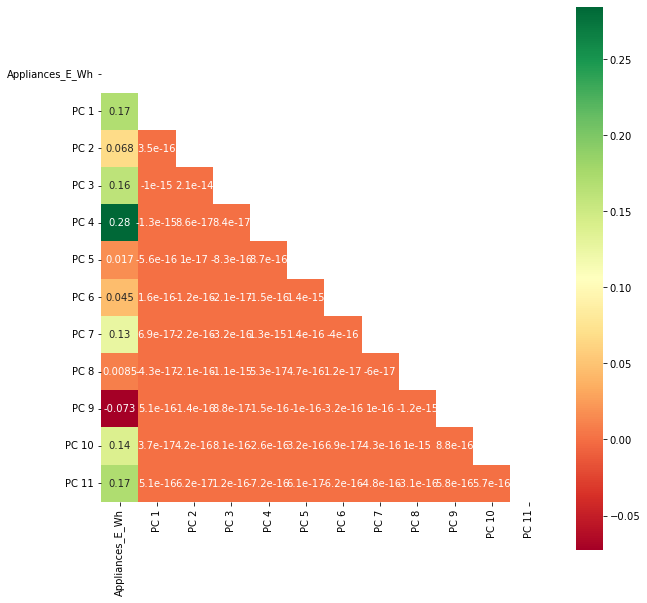

In [35]:
plt.figure(figsize=(10,10))

_ = sns.heatmap(finalDf.corr(), annot=True, mask = np.triu(finalDf.corr()), square=True, cmap='RdYlGn');

# Back to Numeric Data

In [36]:
df.head()

,date,Appliances_E_Wh,Lights_E_Wh,T_Kitchen,H_Kitchen,T_Living,H_Living,T_Laundry,H_Laundry,T_Office,...,T_Teenager,H_Teenager,T_Parents,H_Parents,T_out,Press_out,H_out,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,4.094345,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,4.094345,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,3.912023,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,2016-01-11 17:30:00,3.912023,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,2016-01-11 17:40:00,4.094345,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


## Feature engineering

In [37]:
# Creating average and std columns for T inside 
df['Avg_T_in'] = df.loc[:, ['T_Kitchen','T_Living','T_Laundry','T_Office','T_Bathroom', 'T_Ironning', 'T_Teenager','T_Parents']].mean(axis = 1)
df['Std_T_in'] = df.loc[:, ['T_Kitchen','T_Living','T_Laundry','T_Office','T_Bathroom', 'T_Ironning', 'T_Teenager','T_Parents']].std(axis = 1)

In [38]:
# Creating average and std columns for H inside 
df['Avg_H_in'] = df.loc[:, ['H_Kitchen','H_Living','H_Laundry','H_Office','H_Bathroom','H_Ironing','H_Teenager','H_Parents']].mean(axis = 1)
df['Std_H_in'] = df.loc[:, ['H_Kitchen','H_Living','H_Laundry','H_Office','H_Bathroom','H_Ironing','H_Teenager','H_Parents']].std(axis = 1)

In [39]:
df.head()

,date,Appliances_E_Wh,Lights_E_Wh,T_Kitchen,H_Kitchen,T_Living,H_Living,T_Laundry,H_Laundry,T_Office,...,T_out,Press_out,H_out,Windspeed,Visibility,Tdewpoint,Avg_T_in,Std_T_in,Avg_H_in,Std_H_in
0,2016-01-11 17:00:00,4.094345,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,18.435000,1.195903,46.742500,4.032026
1,2016-01-11 17:10:00,4.094345,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.439167,1.190367,46.672708,4.012524
2,2016-01-11 17:20:00,3.912023,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.366667,733.7,92.0,6.333333,55.333333,5.1,18.421667,1.196837,46.562917,3.996005
3,2016-01-11 17:30:00,3.912023,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,6.250000,733.8,92.0,6.000000,51.500000,5.0,18.396250,1.207580,46.468750,4.021222
4,2016-01-11 17:40:00,4.094345,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,6.133333,733.9,92.0,5.666667,47.666667,4.9,18.408750,1.192937,46.462917,4.039584


In [40]:
# Creating average and std columns for T outside 
df['Avg_T_out'] = df.loc[:, ['T_Building_out_NS', 'T_out', 'Tdewpoint']].mean(axis = 1)
df['Std_T_out'] = df.loc[:, ['T_Building_out_NS', 'T_out', 'Tdewpoint']].std(axis = 1)

In [41]:
# Creating average and std columns for H outside 
df['Avg_H_out'] = df.loc[:, ['H_Building_out_NS', 'H_out', 'Tdewpoint']].mean(axis = 1)
df['Std_H_out'] = df.loc[:, ['T_Building_out_NS', 'T_out', 'Tdewpoint']].std(axis = 1)

In [42]:
df.head()

,date,Appliances_E_Wh,Lights_E_Wh,T_Kitchen,H_Kitchen,T_Living,H_Living,T_Laundry,H_Laundry,T_Office,...,Visibility,Tdewpoint,Avg_T_in,Std_T_in,Avg_H_in,Std_H_in,Avg_T_out,Std_T_out,Avg_H_out,Std_H_out
0,2016-01-11 17:00:00,4.094345,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,63.000000,5.3,18.435000,1.195903,46.742500,4.032026,6.308889,0.899391,60.518889,0.899391
1,2016-01-11 17:10:00,4.094345,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,59.166667,5.2,18.439167,1.190367,46.672708,4.012524,6.172222,0.859963,60.421111,0.859963
2,2016-01-11 17:20:00,3.912023,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,55.333333,5.1,18.421667,1.196837,46.562917,3.996005,6.008889,0.793034,60.085556,0.793034
3,2016-01-11 17:30:00,3.912023,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,51.500000,5.0,18.396250,1.207580,46.468750,4.021222,5.894444,0.780017,60.141111,0.780017
4,2016-01-11 17:40:00,4.094345,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,47.666667,4.9,18.408750,1.192937,46.462917,4.039584,5.800000,0.788106,60.597778,0.788106


In [43]:
df.columns

Index(['date', 'Appliances_E_Wh', 'Lights_E_Wh', 'T_Kitchen', 'H_Kitchen',
       'T_Living', 'H_Living', 'T_Laundry', 'H_Laundry', 'T_Office',
       'H_Office', 'T_Bathroom', 'H_Bathroom', 'T_Building_out_NS',
       'H_Building_out_NS', 'T_Ironning', 'H_Ironing', 'T_Teenager',
       'H_Teenager', 'T_Parents', 'H_Parents', 'T_out', 'Press_out', 'H_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'Avg_T_in', 'Std_T_in',
       'Avg_H_in', 'Std_H_in', 'Avg_T_out', 'Std_T_out', 'Avg_H_out',
       'Std_H_out'],
      dtype='object')

In [44]:
features_T_in = ['T_Kitchen','T_Living','Avg_T_in']
features_T_out = ['T_Building_out_NS','T_out', 'Avg_T_out']

##### Looking at target variable vs the average temperatures and individual temps

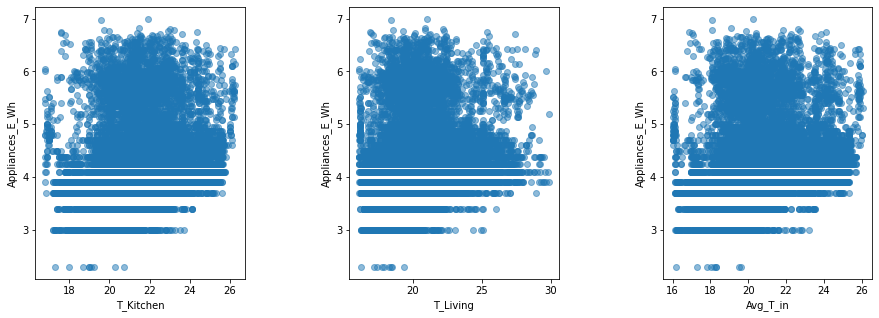

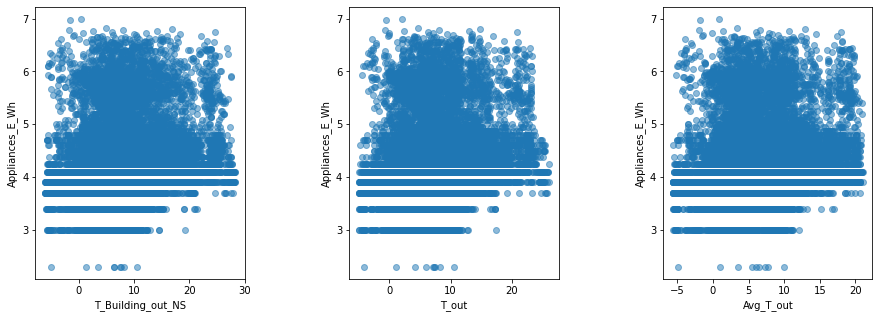

In [45]:
scatterplots(features_T_in, ncol=3, figsize=(15, 5)) 
scatterplots(features_T_out, ncol=3, figsize=(15, 5)) 

In [46]:
features_H_in = ['H_Kitchen','H_Living','Avg_H_in']
features_H_out = ['H_Building_out_NS','H_out', 'Avg_H_out']

##### Looking at target variable vs the average humidities and individual temps

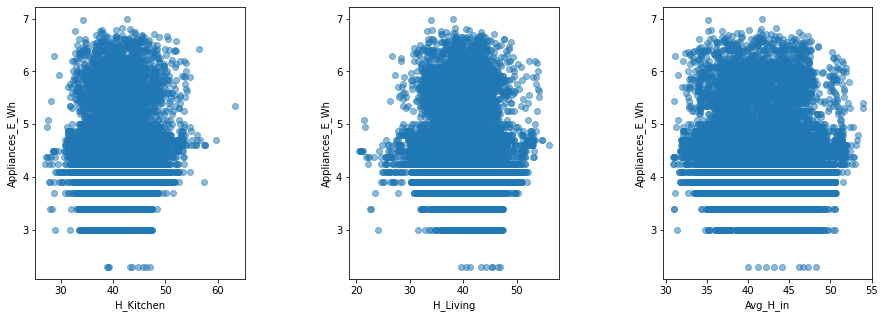

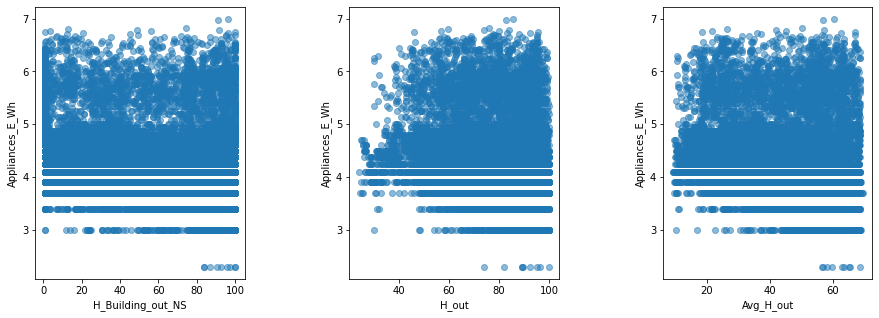

In [47]:
scatterplots(features_H_in, ncol=3, figsize=(15, 5)) 
scatterplots(features_H_out, ncol=3, figsize=(15, 5)) 

###### Average inside and outside temperatures and humidities seem to be correlated similarlry to the Appliances_E_Wh

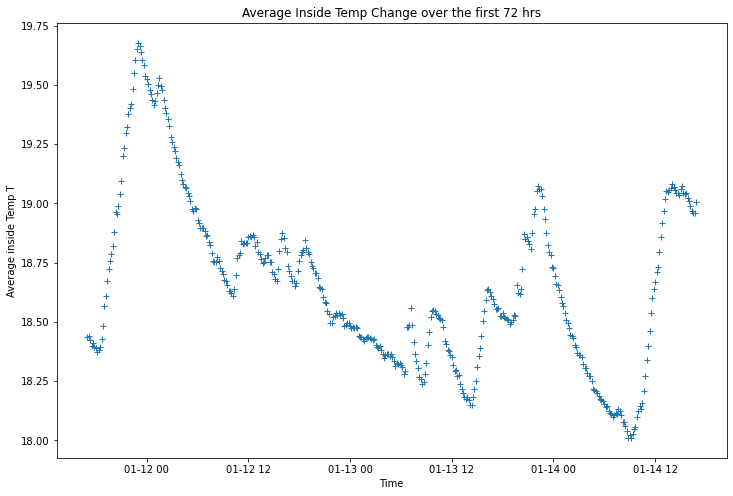

In [48]:
plt.figure(figsize=(12,8))
plt.plot(df['date'][:432], df['Avg_T_in'][:432], marker = '+', linestyle = 'none')
plt.xlabel('Time')
plt.ylabel('Average inside Temp T')
plt.title('Average Inside Temp Change over the first 72 hrs')
plt.subplots_adjust(wspace=0.5);

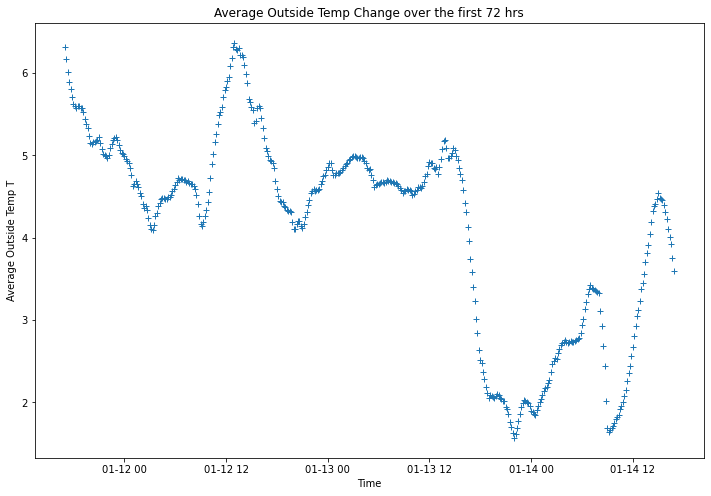

In [49]:
plt.figure(figsize=(12,8))
plt.plot(df['date'][:432], df['Avg_T_out'][:432], marker = '+', linestyle = 'none')
plt.xlabel('Time')
plt.ylabel('Average Outside Temp T')
plt.title('Average Outside Temp Change over the first 72 hrs')
plt.subplots_adjust(wspace=0.5);

Creating a Dataframe with avergae values for T and H (both in and Out) called df_FE

In [50]:
df.columns

Index(['date', 'Appliances_E_Wh', 'Lights_E_Wh', 'T_Kitchen', 'H_Kitchen',
       'T_Living', 'H_Living', 'T_Laundry', 'H_Laundry', 'T_Office',
       'H_Office', 'T_Bathroom', 'H_Bathroom', 'T_Building_out_NS',
       'H_Building_out_NS', 'T_Ironning', 'H_Ironing', 'T_Teenager',
       'H_Teenager', 'T_Parents', 'H_Parents', 'T_out', 'Press_out', 'H_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'Avg_T_in', 'Std_T_in',
       'Avg_H_in', 'Std_H_in', 'Avg_T_out', 'Std_T_out', 'Avg_H_out',
       'Std_H_out'],
      dtype='object')

In [51]:
df_FE = df[['date', 'Appliances_E_Wh', 'Lights_E_Wh','Avg_T_in', 'Avg_H_in', 'Avg_T_out', 'Avg_H_out', 'Press_out', 'Windspeed', 'Visibility']]

In [52]:
df_FE.head().T

,0,1,2,3,4
date,2016-01-11 17:00:00,2016-01-11 17:10:00,2016-01-11 17:20:00,2016-01-11 17:30:00,2016-01-11 17:40:00
Appliances_E_Wh,4.094345,4.094345,3.912023,3.912023,4.094345
Lights_E_Wh,30,30,30,40,40
Avg_T_in,18.435,18.439167,18.421667,18.39625,18.40875
Avg_H_in,46.7425,46.672708,46.562917,46.46875,46.462917
Avg_T_out,6.308889,6.172222,6.008889,5.894444,5.8
Avg_H_out,60.518889,60.421111,60.085556,60.141111,60.597778
Press_out,733.5,733.6,733.7,733.8,733.9
Windspeed,7.0,6.666667,6.333333,6.0,5.666667
Visibility,63.0,59.166667,55.333333,51.5,47.666667


In [53]:
df_FE.corr()

,Appliances_E_Wh,Lights_E_Wh,Avg_T_in,Avg_H_in,Avg_T_out,Avg_H_out,Press_out,Windspeed,Visibility
Appliances_E_Wh,1.000000,0.261442,0.155760,-0.053784,0.159611,-0.200976,-0.072632,0.087722,-0.010970
Lights_E_Wh,0.261442,1.000000,-0.079426,0.095659,-0.069337,0.132873,-0.010576,0.060281,0.020038
Avg_T_in,0.155760,-0.079426,1.000000,-0.004701,0.715720,-0.609519,-0.153418,-0.141601,-0.097171
Avg_H_in,-0.053784,0.095659,-0.004701,1.000000,0.275353,0.534672,-0.265121,0.224227,0.002617
Avg_T_out,0.159611,-0.069337,0.715720,0.275353,1.000000,-0.487019,-0.178377,0.174097,-0.072986
Avg_H_out,-0.200976,0.132873,-0.609519,0.534672,-0.487019,1.000000,-0.104381,0.022579,0.104444
Press_out,-0.072632,-0.010576,-0.153418,-0.265121,-0.178377,-0.104381,1.000000,-0.235032,0.040315
Windspeed,0.087722,0.060281,-0.141601,0.224227,0.174097,0.022579,-0.235032,1.000000,-0.007516
Visibility,-0.010970,0.020038,-0.097171,0.002617,-0.072986,0.104444,0.040315,-0.007516,1.000000


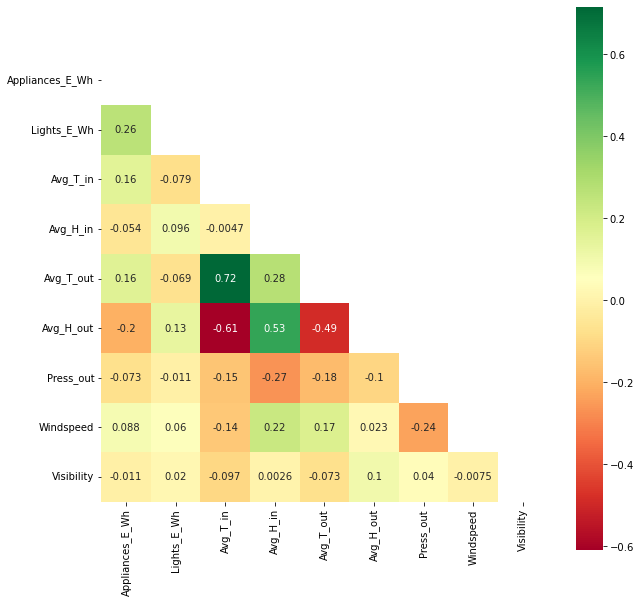

In [54]:
plt.figure(figsize=(10,10))

_ = sns.heatmap(df_FE.corr(), annot=True, square=True, mask = np.triu(df_FE.corr()), cmap='RdYlGn');

In [55]:
# Save the data 

datapath = 'C:/Users/msale/Documents/Springboard Data Science Track_Jan 2022/Springboard-Capstone-Two/Data_Files'

save_file(df_FE, 'Feature_Engineered_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "C:/Users/msale/Documents/Springboard Data Science Track_Jan 2022/Springboard-Capstone-Two/Data_Files\Feature_Engineered_data.csv"
